In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime as dt 
import matplotlib.ticker as mtick

In [9]:
art = pd.read_csv("data/articles.csv")
cust = pd.read_csv("data/customers.csv")
trans = pd.read_csv("data/transactions_train.csv")

# 1. Articles database  

This database contains information about a large variety of articles of H&M shops. 

In [82]:
art.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


Unique indentifier of an article:
* ```article_id``` (int64) - an unique 9-digit identifier of the article, 105 542 unique values (as the length of the database)

5 product related columns:
* ```product_code``` (int64) - 6-digit product code (the first 6 digits of ```article_id```, 47 224 unique values
* ```prod_name``` (object) - name of a product, 45 875 unique values
* ```product_type_no``` (int64) - product type number, 131 unique values
* ```product_type_name``` (object) - name of a product type, equivalent of ```product_type_no```
* ```product_group_name``` (object) - name of a product group, in total 19 groups

2 columns related to the pattern:
* ```graphical_appearance_no``` (int64) - code of a pattern, 30 unique values
* ```graphical_appearance_name``` (object) - name of a pattern, 30 unique values

2 columns related to the color:
* ```colour_group_code``` (int64) - code of a color, 50 unique values
* ```colour_group_name``` (object) - name of a color, 50 unique values

4 columns related to perceived colour (general tone):
* ```perceived_colour_value_id``` - perceived color id, 8 unique values
* ```perceived_colour_value_name``` - perceived color name, 8 unique values
* ```perceived_colour_master_id``` - perceived master color id, 20 unique values
* ```perceived_colour_master_name``` - perceived master color name, 20 unique values

2 columns related to the department:
* ```department_no``` - department number, 299 unique values
* ```department_name``` - department name, 299 unique values

4 columns related to the index, which is actually a top-level category:
* ```index_code``` - index code, 10 unique values
* ```index_name``` - index name, 10 unique values
* ```index_group_no``` - index group code, 5 unique values
* ```index_group_name``` - index group code, 5 unique values

2 columns related to the section:
* ```section_no``` - section number, 56 unique values
* ```section_name``` - section name, 56 unique values

2 columns related to the garment group:
* ```garment_group_n``` - section number, 56 unique values
* ```garment_group_name``` - section name, 56 unique values

1 column with a detailed description of the article:
* ```detail_desc``` - 43 404 unique values

In [83]:
art.groupby(['index_group_name', 'index_name']).size()

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
dtype: int64

In [86]:
art.groupby(['index_name','product_group_name']).size()

index_name        product_group_name
Baby Sizes 50-98  Accessories            986
                  Garment Full body     2237
                  Garment Lower body    1445
                  Garment Upper body    2602
                  Interior textile         3
                                        ... 
Sport             Shoes                    2
                  Socks & Tights         143
                  Swimwear                76
                  Underwear              311
                  Unknown                 11
Length: 99, dtype: int64

In [87]:
art.groupby(['product_group_name','product_type_name']).size()

product_group_name   product_type_name
Accessories          Accessories set         7
                     Alice band              6
                     Baby Bib                3
                     Bag                  1280
                     Beanie                 56
                                          ... 
Underwear            Underwear corset        7
                     Underwear set          47
Underwear/nightwear  Sleep Bag               6
                     Sleeping sack          48
Unknown              Unknown               121
Length: 132, dtype: int64

In [94]:
data = art['product_group_name'].value_counts()
data = data.div(data.sum())*100
data = data.cumsum().rename('cumulative_pct')
data = data.reset_index()
data.columns = ['group', 'cumulative_pct']
data

,group,cumulative_pct
0,Garment Upper body,40.496674
1,Garment Lower body,59.268348
2,Garment Full body,71.862387
3,Accessories,82.434481
4,Underwear,87.636202
5,Shoes,92.641792
6,Swimwear,95.604593
7,Socks & Tights,97.918364
8,Nightwear,99.717648
9,Unknown,99.832294


The key takeaways here are:
* The hierarhy of categories is: index_group --> index --> group --> type
* Over 80% of the products lays in 4 product groups (out of 19)

In [1]:
def show_items_in_category(column, value, no_imgs=4, title=None):
    data = art[art[column]==value]
    cat_ids = data['article_id'].iloc[:no_imgs].to_list()
    
    fig, ax = plt.subplots(1, no_imgs, figsize=(12,4))

    for i, prod_id in enumerate(cat_ids):
        folder = str(prod_id)[:2]
        file_path = f'images/0{folder}/0{prod_id}.jpg'

        img = plt.imread(file_path)       
        ax[i].imshow(img, aspect='equal')
        ax[i].grid(False)
        ax[i].set_xticks([], [])
        ax[i].set_yticks([], [])
        ax[i].set_xlabel(art[art['article_id']==int(prod_id)]['prod_name'].iloc[0])
    
    fig.suptitle(title)
    plt.show()

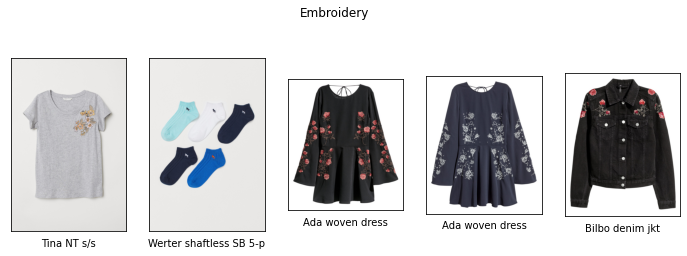

In [8]:
show_items_in_category('graphical_appearance_name', 'Embroidery', 5,  'Embroidery')

# 2. Customers database

This database contains data about customers eg features like sex, age, address, etc. 

In [46]:
cust.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
#cust['FN'].value_counts().index
#cust['Active'].value_counts().index
#cust['club_member_status'].value_counts().index
#cust['fashion_news_frequency'].value_counts().index
#cust['age'].value_counts().index
#cust['postal_code'].value_counts().index

Unique indentifier of a customer:
* ```customer_id``` - an unique identifier of the customer

5 product related columns:
* ```FN``` - binary feature (1 or NaN)
* ```Active``` - binary feature (1 or NaN)
* ```club_member_status``` - status in a club, 3 unique values
* ```fashion_news_frequency``` - frequency of sending communication to the customer, 4 unique values
* ```age```  - age of the customer
* ```postal_code``` - postal code (anonimized), 352 899 unique values

In [71]:
cust.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [72]:
cust_backup = cust.copy()
cust[['FN','Active']] = cust[['FN','Active']].fillna(0)

Text(32.0, 0.035, 'median: 32.0')

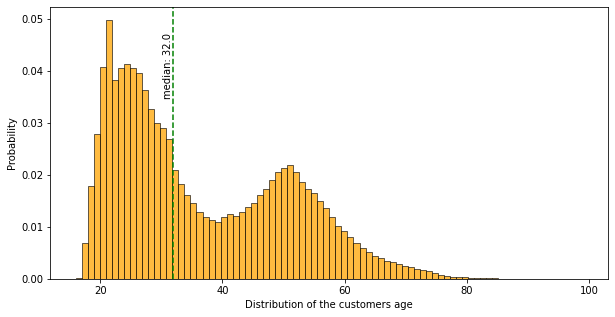

In [66]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data = cust, x = 'age', bins=cust['age'].nunique(), color='orange', stat = 'probability')
ax.set_xlabel('Distribution of the customers age')
median = cust['age'].median()
ax.axvline(x = median, color = 'green', ls = '--')
ax.text(median, 0.035, f'median: {round(median,1)}', rotation='vertical', ha='right')

The distribution shows that there are two main age-groups of customers: around 20-30 years old and 45-55 years old.

Text(0.5, 0, 'Distribution of the customers age')

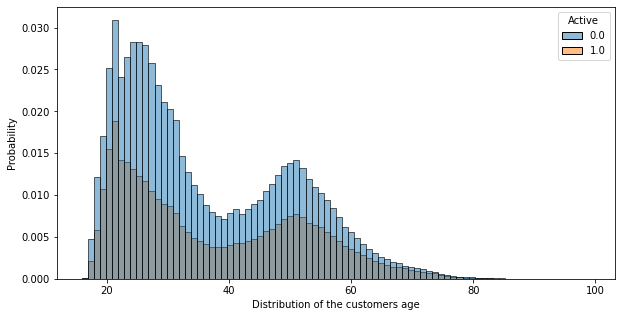

In [73]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=cust, x='age', bins=cust['age'].nunique(), hue='Active', stat="probability")
ax.set_xlabel('Distribution of the customers age')

In [79]:
active_age_ratio = cust.groupby('age')['Active'].value_counts(normalize=True).mul(100)
active_age_ratio = active_age_ratio.rename('Active_ratio', inplace=True).reset_index()
active_age_ratio = active_age_ratio[active_age_ratio['Active']==1]
active_age_ratio['Active'] = active_age_ratio['Active'].astype(int)
active_age_ratio['age'] = active_age_ratio['age'].astype(int)

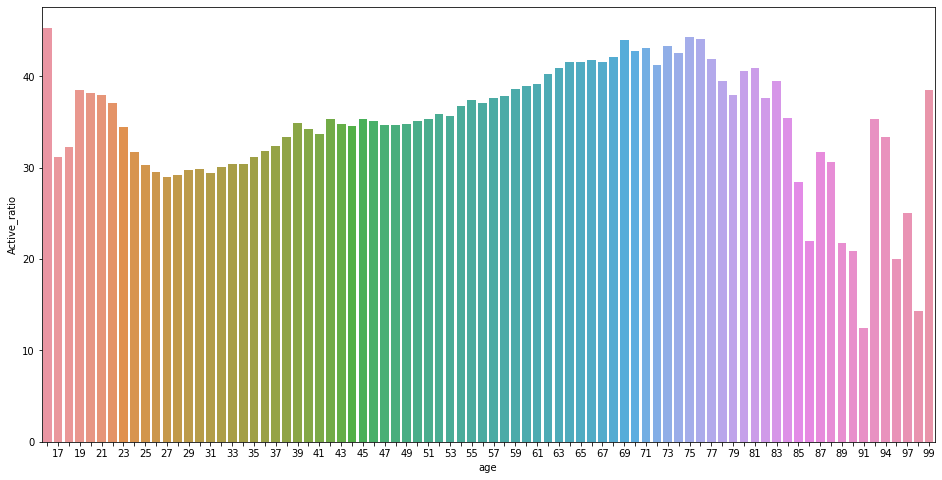

In [81]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(data = active_age_ratio, x = 'age', y = 'Active_ratio')
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

# 3. Transactions

This is a large dataset containing all transactions every day.

In [3]:
trans.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [6]:
trans_dtypes = trans.dtypes.value_counts()
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


Columns description:
* ```t_dat``` - date of a transaction in format YYYY-MM-DD but provided as a string
* ```customer_id``` - identifier of the customer which can be mapped to the ```customer_id```  column in the ```customers``` table
* ```article_id``` - identifier of the product which can be mapped to the ```article_id```  column in the ```articles``` table
* ```price``` - price paid
* ```sales_channel_id``` - sales channel, 2 unique values

The data distribution over time - what dates range is provided.

In [8]:
trans['t_dat'] = pd.to_datetime(trans['t_dat'])

In [9]:
begin = trans['t_dat'].min()
end = trans['t_dat'].max()
print(f'Date range is from {begin.date()} to {end.date()}.')

Date range is from 2018-09-20 to 2020-09-22.


We have full 2 years of data. Let's plot now number of transactions per day over the full period of time.

In [11]:
t_per_day = trans.groupby('t_dat',as_index=False).count()

In [12]:
t_per_day.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,48399,48399,48399,48399
1,2018-09-21,47543,47543,47543,47543
2,2018-09-22,17635,17635,17635,17635
3,2018-09-23,52230,52230,52230,52230
4,2018-09-24,45984,45984,45984,45984


Text(0, 0.5, 'number of transactions')

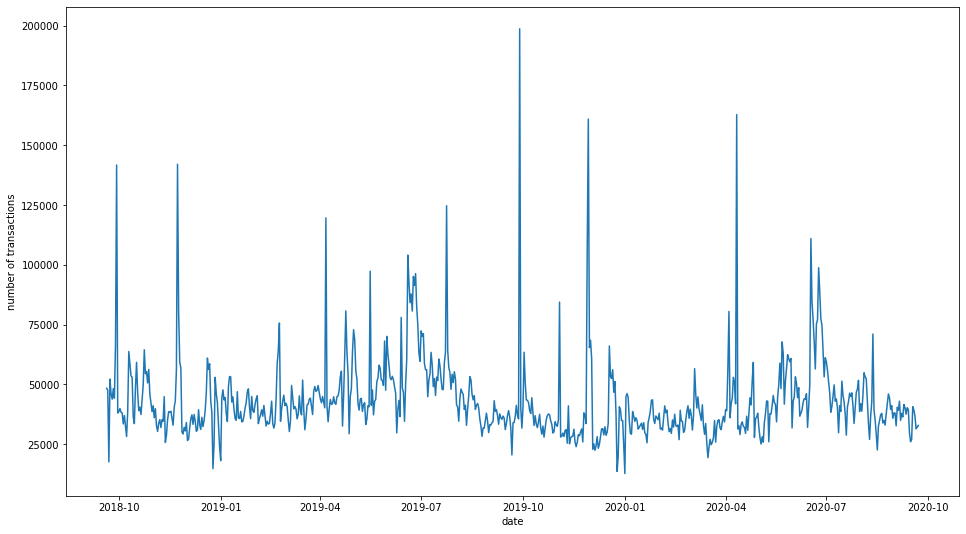

In [16]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.lineplot(data = t_per_day, x = 't_dat', y = 'customer_id')
ax.set_xlabel('date')
ax.set_ylabel('number of transactions')

From the graph above we see that there are distinct variations and spikes in the number of transactions per day. It would be clearer to visualise this by using box plots with monthly aggregations.

In [24]:
trans_gr_month = trans.groupby('t_dat').size().rename('no_transactions')
trans_gr_month = trans_gr_month.reset_index()
trans_gr_month['month_year'] = trans_gr_month['t_dat'].dt.to_period('M')

Text(0, 0.5, 'Number of transactions')

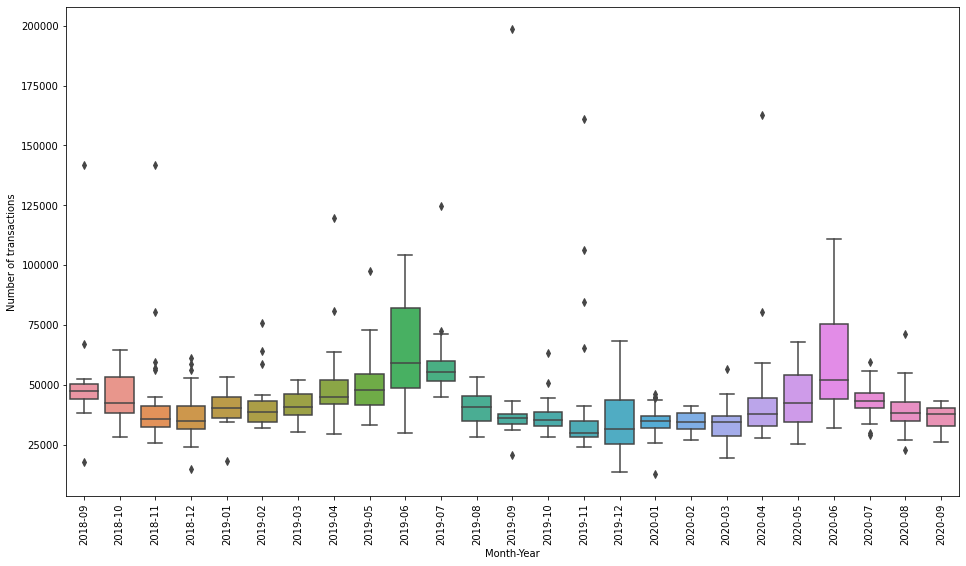

In [27]:
fig, ax = plt.subplots(figsize = (16, 9))
ax = sns.boxplot(data = trans_gr_month, x = 'month_year', y = 'no_transactions')
plt.xticks(rotation=90)
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of transactions')

The bar chart above show us that per day usuall number of transactions lays in range about between 25 000 and 80 000 transactions per day. We see also that sales spikes during summertime and drops during winter.

Text(0.5, 0, 'Distribution of total transactions per customer')

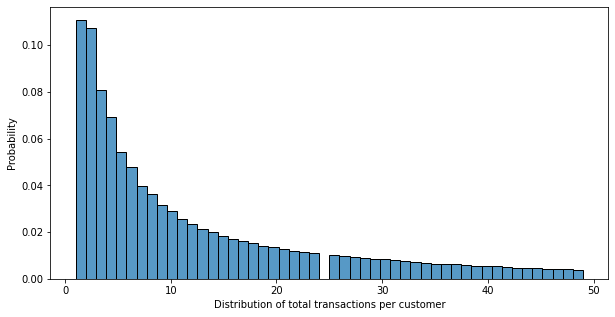

In [45]:
t_by_customer = trans.groupby('customer_id', as_index=False).size()
t_by_customer_50tr = t_by_customer[t_by_customer['size'] < 50]
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=t_by_customer_50tr, x='size', bins=50, stat = 'probability')
ax.set_xlabel('Distribution of total transactions per customer')

The graph above shows us that most of customers, on average, bought only few items during these 2 years.